# Stationary distribution - Restricted Brownian motion

In [1]:
# Libraries ----
import sys
import warnings
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

sys.path.append('../modules')
import eda_brownian_motion as edabm # type: ignore
import estimate_stochastic_process as esp # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2024-08-14"

## Brownian motion simulations

In [3]:
mu = 0 # Stochastic drift
sigma = 0.2 # Diffusion coefficient
x0 = 0 # Initial value
t0 = 0 # Initial time
tf = 10 # Last time
n_steps = 11 # Number of steps per simulation
n_samples = 20 # Number of simulations

In [4]:
# Brownian motion arguments list sampling ----
bm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
bm_args_list = bm_args_list.values.tolist()


In [5]:
# Simulate multiple Brownian motion paths
df_bm = esp.simulate_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = 0,
    threshold_flag = False,
    geometric_flag = False,
    bm_args_list = bm_args_list,
    log_path = log_path,
    log_filename = "log_bm",
    verbose = 1,
    tqdm_bar = True
)
df_bm

100%|███████████████████████| 20/20 [00:02<00:00,  8.13it/s]


,simulation,restricted,time,value
0,1,False,0.0,0.000000
1,1,False,1.0,0.233319
2,1,False,2.0,0.495472
3,1,False,3.0,0.682647
4,1,False,4.0,0.885489
...,...,...,...,...
6,20,False,6.0,0.122566
7,20,False,7.0,0.454306
8,20,False,8.0,0.459263
9,20,False,9.0,0.628731


## Brownian motion with threshold

In [6]:
mu = 1 * 10**-1 # Stochastic drift
sigma = 2 * 10**0 # Diffusion coefficient
threshold = 0 * 10**-1 # Threshold value
x0 = 0 * 10**0 # Initial value
t0 = 0 * 10**0 # Initial time
tf = 5 * 10**1 # Last time
n_steps = 5 * 10 ** 3 + 1 # Number of steps per simulation
n_samples = 4 * 10 ** 4 # Number of simulations

In [7]:
# Restricted Brownian motion arguments list sampling ----
rbm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
rbm_args_list = rbm_args_list.values.tolist()


In [8]:
# Simulate multiple of restricted Brownian motion paths
df_rbm = esp.simulate_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = threshold,
    threshold_flag = True,
    geometric_flag = False,
    bm_args_list = rbm_args_list,
    log_path = log_path,
    log_filename = "log_rbm",
    verbose = 1,
    tqdm_bar = True
)
df_rbm

100%|███████████████| 40000/40000 [00:33<00:00, 1206.88it/s]


,simulation,restricted,time,value
0,1,True,0.00,0.000000
1,1,True,0.01,0.007155
2,1,True,0.02,0.188128
3,1,True,0.03,0.172755
4,1,True,0.04,0.255984
...,...,...,...,...
4996,40000,True,49.96,20.713645
4997,40000,True,49.97,20.897373
4998,40000,True,49.98,20.507883
4999,40000,True,49.99,20.702024


# Exploratory Data Analysis

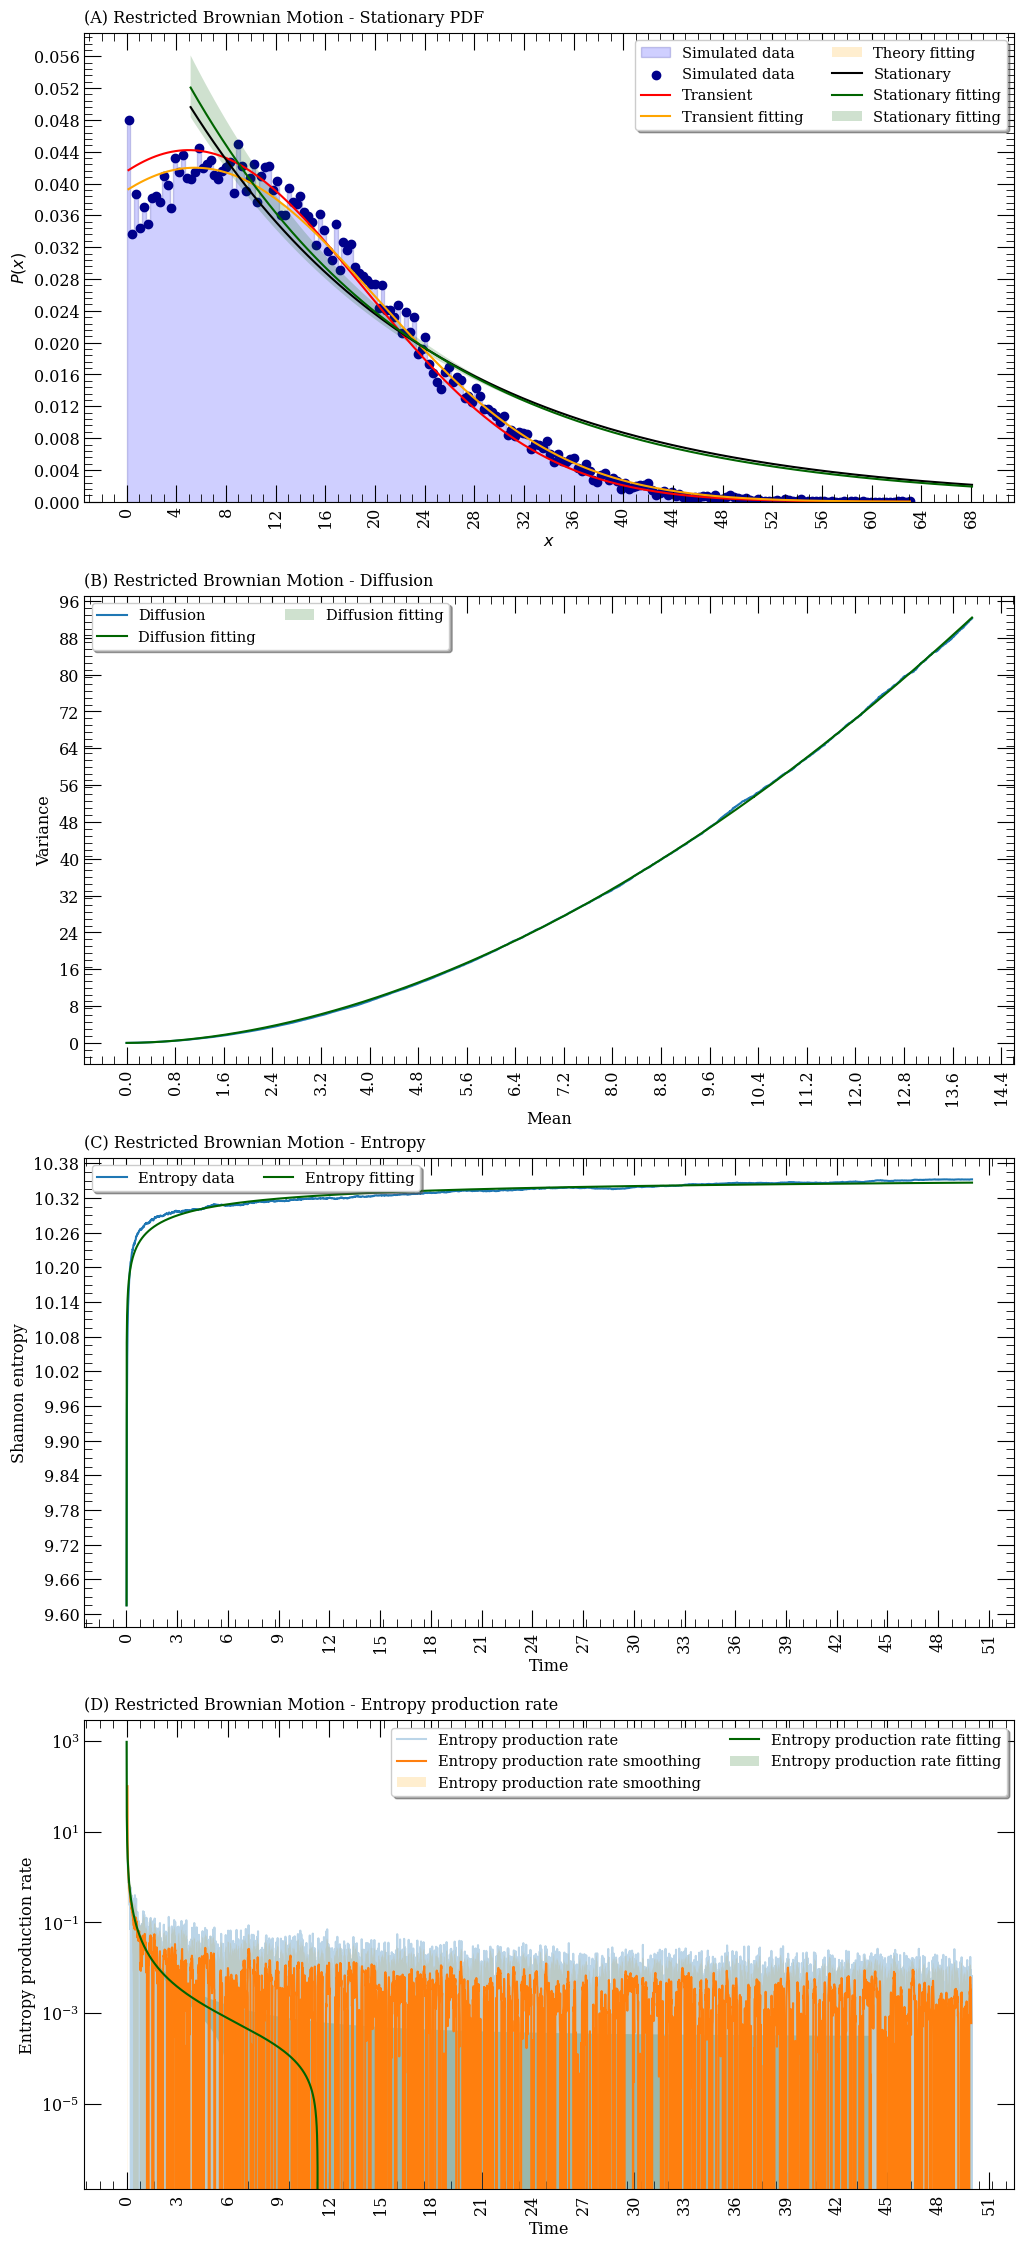

,fitting,params_name,params_value,params_lower,params_upper,r_squared,p_norm,mae_p
0,Transient state,time,5.250000e+01,-2.077053e+07,2.077064e+07,99.088,1,0.000944
1,Transient state,mu,1.050000e-01,-4.154107e+04,4.154128e+04,99.088,1,0.000944
2,Transient state,sigma,2.029345e+00,-4.014330e+05,4.014371e+05,99.088,1,0.000944
3,Transient state,threshold,9.957587e-07,-1.736878e-01,1.736898e-01,99.088,1,0.000944
0,Stationary state,threshold,1.000000e-06,-5.860292e-01,5.860312e-01,85.908,1,0.004944
1,Stationary state,lambda,5.250000e-02,5.019217e-02,5.480783e-02,85.908,1,0.004944
0,Diffusion law,coefficient,7.375861e-01,7.369820e-01,7.381902e-01,99.993,1,0.175320
1,Diffusion law,exponent,1.834370e+00,1.834036e+00,1.834704e+00,99.993,1,0.175320
0,Entropy,mu,-9.115866e-01,-1.443879e+03,1.442056e+03,93.925,1,0.003959
1,Entropy,sigma,1.955582e+00,-3.093349e+03,3.097260e+03,93.925,1,0.003959


In [9]:
edabm.plot_brownian_motion(
    df_bm = df_rbm,
    mu = mu,
    sigma = sigma,
    threshold = threshold,
    n_steps = n_steps,
    bins = int(np.sqrt(n_samples))+1,
    density = True,
    alpha = 0.05,
    beta = -6,
    p = 1,
    ma_window = 10,
    p_norm = 1,
    significant_figures = 3,
    width = 12,
    height = 28,
    fontsize_labels = 11.5,
    fontsize_legend = 10.5,
    n_cols = 2,
    n_x_breaks = 20,
    n_y_breaks = 15,
    fancy_legend = True,
    usetex = False,
    dpi = 200,
    save_figures = False,
    output_path = output_path,
    information_name = "rbm_stationary",
    input_generation_date = input_generation_date
)

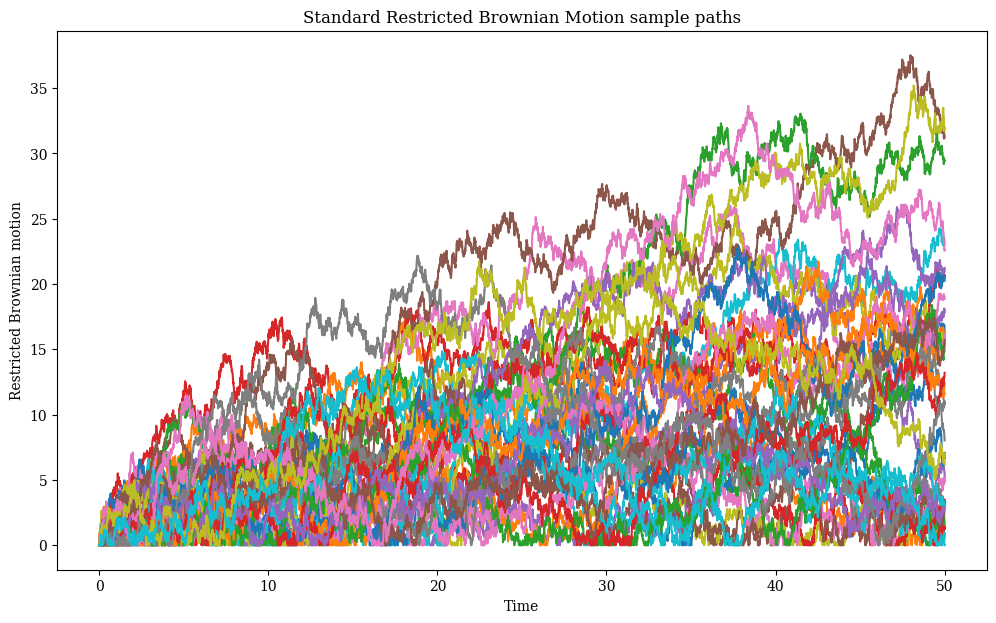

In [10]:
# Restricted Brownian motion samples ----
fig_2, ax_2 = plt.subplots(1, 1, figsize = (12, 7))

for path in range(0, 40):
    df_aux = df_rbm[df_rbm["simulation"] == path]
    ax_2.plot(
        df_aux["time"],
        df_aux["value"],
        alpha = 1,
        zorder = 2,
        marker = "",
        linestyle = "-",
        markersize = 1
    )
ax_2.set_title("Standard Restricted Brownian Motion sample paths")
ax_2.set_xlabel("Time")
ax_2.set_ylabel("Restricted Brownian motion")
plt.show()